In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the flights dataset
flights = sns.load_dataset('flights')


In [ ]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [ ]:
flights.isna().sum()

,0
year,0
month,0
passengers,0


In [ ]:
flights.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


In [ ]:
{col: flights[col].nunique() for col in flights.select_dtypes(include=['category', 'object']).columns}

{'month': 12}

In [ ]:
flights.corr(numeric_only=True)

,year,passengers
year,1.000000,0.921824
passengers,0.921824,1.000000


In [ ]:
flights.groupby('month')['passengers'].agg(['mean', 'min', 'max', 'std'])

<ipython-input-13-46ff417fc9d6>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  flights.groupby('month')['passengers'].agg(['mean', 'min', 'max', 'std'])


,mean,min,max,std
month,,,,
Jan,241.750000,112,417,101.032960
Feb,235.000000,118,391,89.619397
Mar,270.166667,132,419,100.559194
Apr,267.083333,129,461,107.374839
May,271.833333,121,472,114.739890
Jun,311.666667,135,535,134.219856
Jul,351.333333,148,622,156.827255
Aug,351.083333,148,606,155.783333
Sep,302.416667,136,508,123.954140


In [ ]:
Q1, Q3 = flights['passengers'].quantile(0.25), flights['passengers'].quantile(0.75); flights[(flights['passengers'] < Q1 - 1.5 * (Q3 - Q1)) | (flights['passengers'] > Q3 + 1.5 * (Q3 - Q1))]

,year,month,passengers


<Axes: title={'center': 'Passenger Trend Over Time'}, xlabel='year'>

<Figure size 1440x720 with 0 Axes>

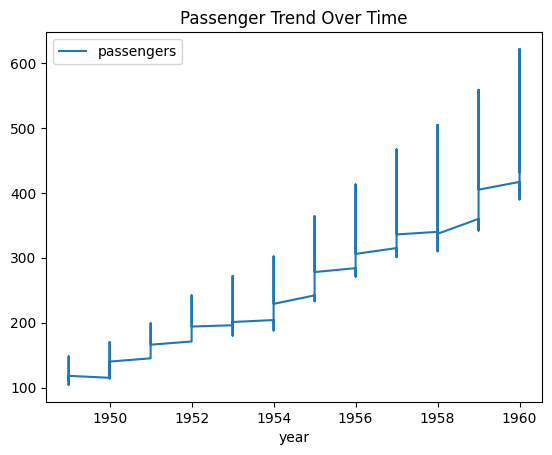

In [ ]:
plt.figure(figsize=(12, 6), dpi=120)
flights.plot(x='year', y='passengers', title='Passenger Trend Over Time')

In [ ]:
flights.assign(pct_change=flights['passengers'].pct_change() * 100)

,year,month,passengers,pct_change
0,1949,Jan,112,NaN
1,1949,Feb,118,5.357143
2,1949,Mar,132,11.864407
3,1949,Apr,129,-2.272727
4,1949,May,121,-6.201550
...,...,...,...,...
139,1960,Aug,606,-2.572347
140,1960,Sep,508,-16.171617
141,1960,Oct,461,-9.251969
142,1960,Nov,390,-15.401302


<Axes: title={'center': 'Monthly Passenger Counts by Year'}, xlabel='year'>

<Figure size 1440x720 with 0 Axes>

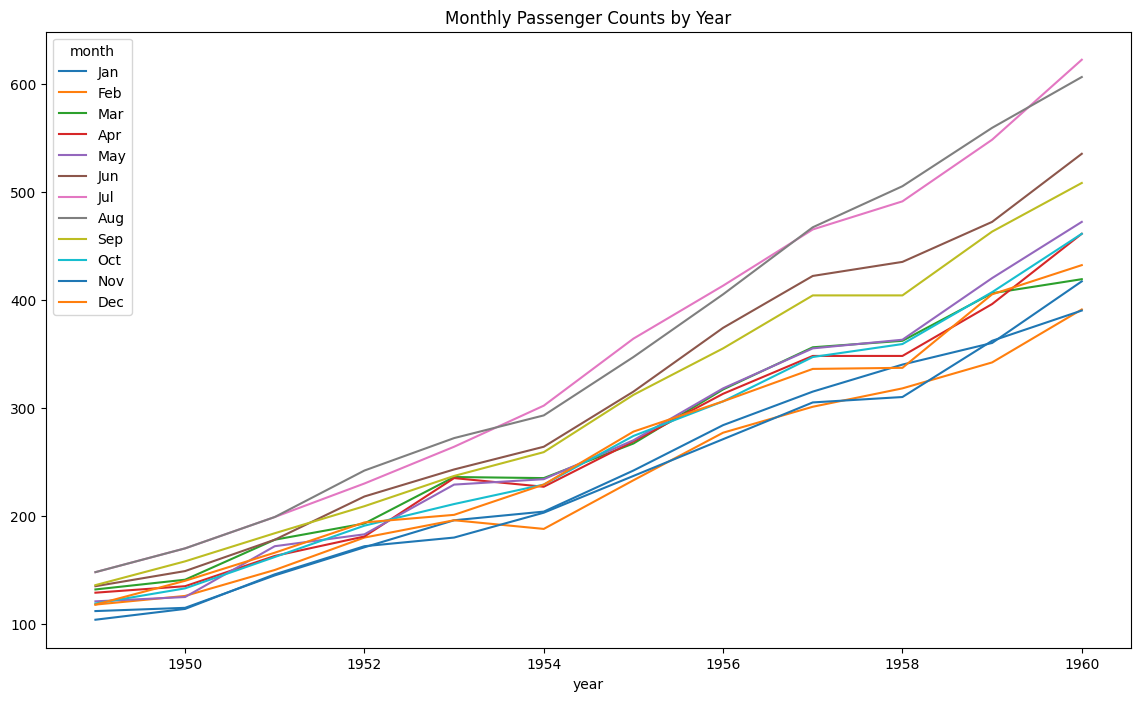

In [ ]:
plt.figure(figsize=(12, 6), dpi=120)
flights.pivot(index='year', columns='month', values='passengers').plot(figsize=(14, 8), title='Monthly Passenger Counts by Year')